# Medical Insurance Cost - Neural Network Regression

This project is the first step into a larger dataset for regression analysis. The purpose of this is to build out what an actual regression deep learning project might look like using actual data.

Going to look at the medical cost dataset from Kaggle:
* https://www.kaggle.com/datasets/mirichoi0218/insurance?r

## Setup and Define Helpers

1. Import all required files
2. Define all helper methods used

### Imports

In [1]:
import os
import random
import sys

module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import plot_model

from src import utils

### Plot Helper Functions

In [2]:
def plot_actual_versus_predicted_data(y_true, y_predict):
    """ Plots the actual true values against the predicted values.
        Note that better predictions have a slope closer to 1.
    """
    plt.figure(figsize=(10, 7))
    
    plt.title('Actual Value vs. Predicted Value')
    plt.scatter(y_true, y_predict)

    
def plot_history(history):
    pd.DataFrame(history.history).plot()
    plt.ylabel('Loss')
    plt.xlabel('Epochs')

### Metrics Helpers

In [3]:
def mae(y_true, y_pred):
    return tf.keras.metrics.mean_absolute_error(tf.squeeze(y_true), tf.squeeze(y_pred))


def mse(y_true, y_pred):
    return tf.keras.metrics.mean_squared_error(tf.squeeze(y_true), tf.squeeze(y_pred))


def visualize_model(model):
    return plot_model(model, show_shapes=True, show_layer_names=True)

## Step-0: Get & Analyze the Data

Need to look at the data to see what needs to be done to build out a model.

In [4]:
# Reading the dataset from the raw csv file on the public github file
csv_dataset_url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
insurance = pd.read_csv(csv_dataset_url)

In [5]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# Looking at the spread of the number of children
insurance['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

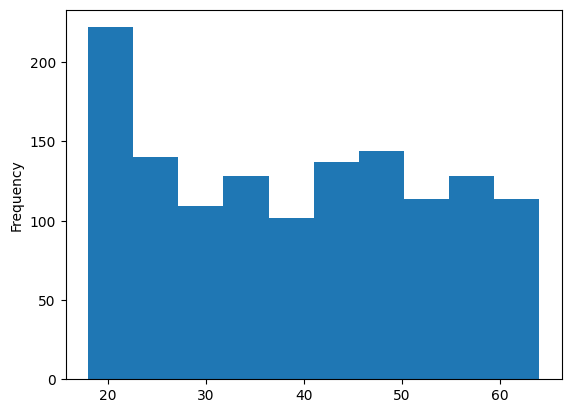

In [7]:
insurance['age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

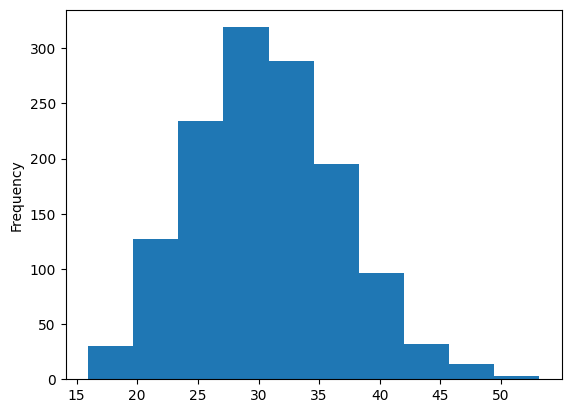

In [8]:
insurance['bmi'].plot(kind='hist')

## Step-1: Preprocess the Data

1. Need to encode string variables to one hot encoder value.
2. Scaling features (normalizing, standarizing, etc.)

In [9]:
# Creating the Feature Scaler and One Hot Encoder
column_transformer = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),  # turn all value in these columns between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region']))

## Step-2: Splitting the Training & Test Data

In [10]:
# Creating a TensorFlow Tensor from the df
y_column_name = 'charges'
X_df = insurance.drop(y_column_name, axis=1)
y_df = insurance[y_column_name]

In [11]:
# Splitting the data to test and train
# NOTE: We do not need to convert these to tensors, Pandas is built on top of numpy which is handled directly
# with the model

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
column_transformer.fit(X_train)
X_train_normal = column_transformer.transform(X_train)
X_test_normal = column_transformer.transform(X_test)

In [12]:
# What does the data look like?
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

## Step-3: Creating and Visualizing the Model

I am going to create, compile, and fit a simple model as my first Trial to get a Baseline on where to start.

### Trial-1: No Hidden Layers, epochs=10

#### Creating, Compiling, & Fitting Model

In [13]:
# Need to figure out how many input variables there are for the Input layer
number_of_input_variables = X_train_normal.shape[-1]

# 1. Creating Model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(number_of_input_variables,), name='InputLayer'),
    tf.keras.layers.Dense(1, name='OutputLayer')
])

# 2. Compiling Model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.legacy.SGD(),
              metrics=['mae'])

# 3. Fitting Model
history_1 = model_1.fit(X_train_normal, y_train, epochs=10)

Epoch 1/10
34/34 [==============================] - 0s 485us/step - loss: 13345.9971 - mae: 13345.9971
Epoch 2/10
34/34 [==============================] - 0s 467us/step - loss: 13345.0303 - mae: 13345.0303
Epoch 3/10
34/34 [==============================] - 0s 448us/step - loss: 13344.0625 - mae: 13344.0625
Epoch 4/10
34/34 [==============================] - 0s 412us/step - loss: 13343.0967 - mae: 13343.0967
Epoch 5/10
34/34 [==============================] - 0s 432us/step - loss: 13342.1299 - mae: 13342.1299
Epoch 6/10
34/34 [==============================] - 0s 428us/step - loss: 13341.1641 - mae: 13341.1641
Epoch 7/10
34/34 [==============================] - 0s 411us/step - loss: 13340.1953 - mae: 13340.1953
Epoch 8/10
34/34 [==============================] - 0s 390us/step - loss: 13339.2334 - mae: 13339.2334
Epoch 9/10
34/34 [==============================] - 0s 407us/step - loss: 13338.2656 - mae: 13338.2656
Epoch 10/10
34/34 [==============================] - 0s 389us/step - loss

#### Predicting Model

In [14]:
# Predicting
y_pred_1 = model_1.predict(X_test_normal)

9/9 [==============================] - 0s 403us/step


#### Evaluating Model

In [15]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 OutputLayer (Dense)         (None, 1)                 12        
                                                                 
Total params: 12 (48.00 Byte)
Trainable params: 12 (48.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


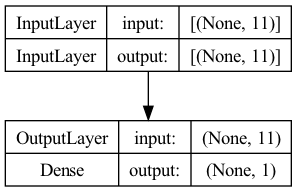

In [16]:
visualize_model(model_1)

In [17]:
mae_1 = mae(y_test, y_pred_1)
mse_1 = mae(y_test, y_pred_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=12958.995>,
 <tf.Tensor: shape=(), dtype=float32, numpy=12958.995>)

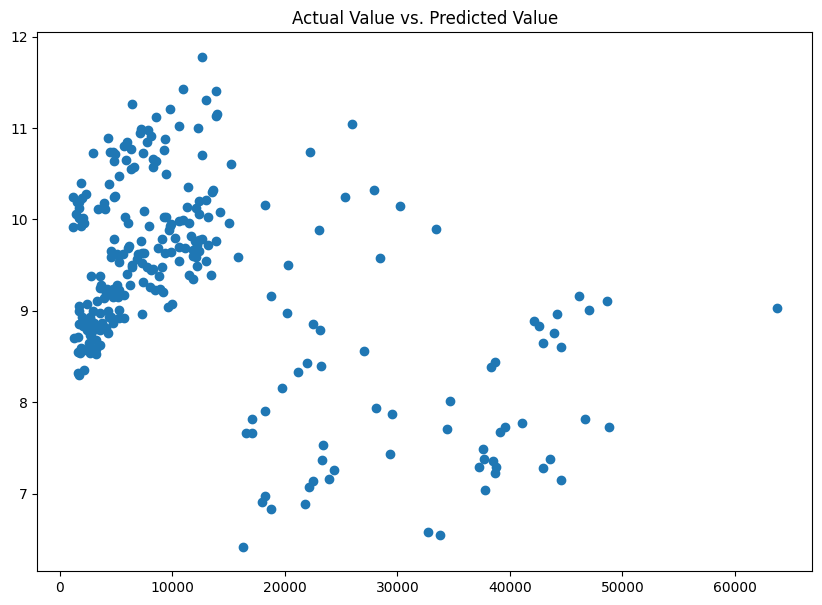

In [18]:
plot_actual_versus_predicted_data(y_test, y_pred_1)

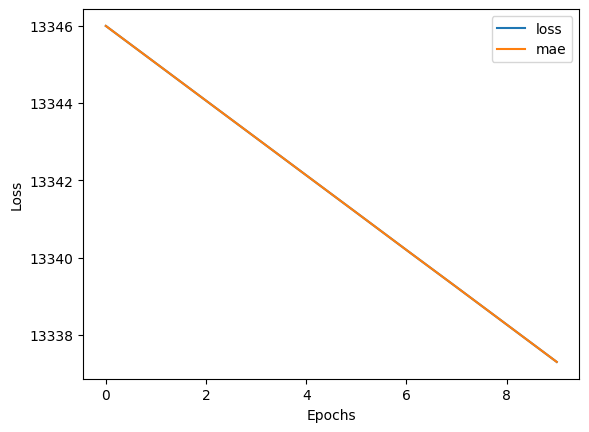

In [19]:
plot_history(history_1)

### Trial-2: Hidden layer with 100 Neurons & Adam Optimizer

#### Creating, Compiling, & Fitting Model

In [20]:
# Need to figure out how many input variables there are for the Input layer
number_of_input_variables = X_train_normal.shape[-1]

# 1. Creating Model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(number_of_input_variables,), name='InputLayer'),
    tf.keras.layers.Dense(100, name='HiddenLayer-1'),
    tf.keras.layers.Dense(1, name='OutputLayer')
])

# 2. Compiling Model
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.legacy.Adam(lr=0.01),
              metrics=['mae'])

# 3. Fitting Model
history_2 = model_2.fit(X_train_normal, y_train, epochs=10)

Epoch 1/10
34/34 [==============================] - 0s 591us/step - loss: 13318.0781 - mae: 13318.0781
Epoch 2/10
34/34 [==============================] - 0s 594us/step - loss: 13135.1133 - mae: 13135.1133
Epoch 3/10
34/34 [==============================] - 0s 589us/step - loss: 12682.4648 - mae: 12682.4648
Epoch 4/10
 1/34 [..............................] - ETA: 0s - loss: 13550.8096 - mae: 13550.8096

/Users/brandonkubick/Code/deep-learning-development/env/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


34/34 [==============================] - 0s 517us/step - loss: 11920.9590 - mae: 11920.9590
Epoch 5/10
34/34 [==============================] - 0s 491us/step - loss: 10949.1387 - mae: 10949.1387
Epoch 6/10
34/34 [==============================] - 0s 521us/step - loss: 9983.5732 - mae: 9983.5732
Epoch 7/10
34/34 [==============================] - 0s 505us/step - loss: 9150.1455 - mae: 9150.1455
Epoch 8/10
34/34 [==============================] - 0s 484us/step - loss: 8565.1416 - mae: 8565.1416
Epoch 9/10
34/34 [==============================] - 0s 478us/step - loss: 8183.0122 - mae: 8183.0122
Epoch 10/10
34/34 [==============================] - 0s 473us/step - loss: 7959.2983 - mae: 7959.2983


#### Predicting Model

In [21]:
# Predicting
y_pred_2 = model_2.predict(X_test_normal)

9/9 [==============================] - 0s 429us/step


#### Evaluating Model

In [22]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer-1 (Dense)       (None, 100)               1200      
                                                                 
 OutputLayer (Dense)         (None, 1)                 101       
                                                                 
Total params: 1301 (5.08 KB)
Trainable params: 1301 (5.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


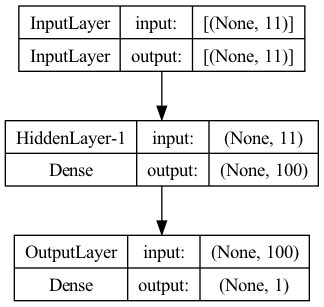

In [23]:
visualize_model(model_2)

In [24]:
mae_2 = mae(y_test, y_pred_2)
mse_2 = mae(y_test, y_pred_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=8081.248>,
 <tf.Tensor: shape=(), dtype=float32, numpy=8081.248>)

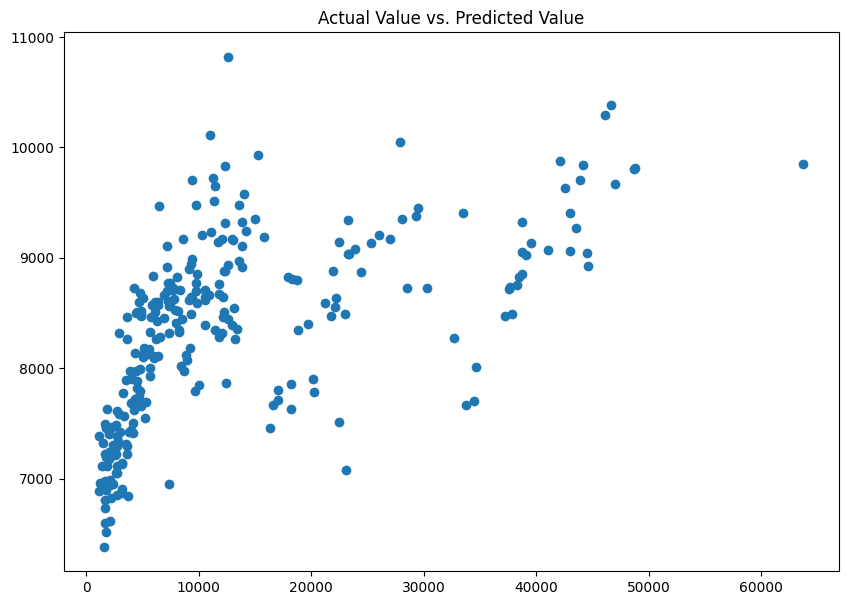

In [25]:
plot_actual_versus_predicted_data(y_test, y_pred_2)

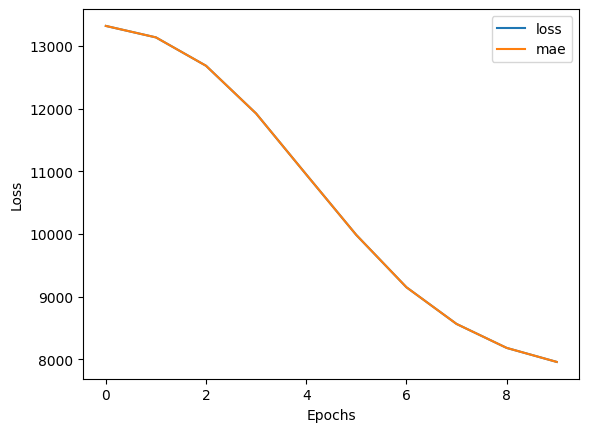

In [26]:
plot_history(history_2)

### Trial-3: 2 Hidden layers with 100 Neurons & Adam Optimizer w/ 0.05 lr & Epochs=100

#### Creating, Compiling, & Fitting Model

In [27]:
# Need to figure out how many input variables there are for the Input layer
number_of_input_variables = X_train_normal.shape[-1]

# 1. Creating Model
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(number_of_input_variables,), name='InputLayer'),
    tf.keras.layers.Dense(100, name='HiddenLayer-1'),
    tf.keras.layers.Dense(100, name='HiddenLayer-2'),
    tf.keras.layers.Dense(1, name='OutputLayer')
])

# 2. Compiling Model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.legacy.Adam(lr=0.05),
                metrics=['mae'])

# 3. Fitting Model
history_3 = model_3.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 596us/step - loss: 9333.6523 - mae: 9333.6523
Epoch 2/100
34/34 [==============================] - 0s 584us/step - loss: 4467.2607 - mae: 4467.2607
Epoch 3/100
34/34 [==============================] - 0s 585us/step - loss: 3927.7407 - mae: 3927.7407
Epoch 4/100


/Users/brandonkubick/Code/deep-learning-development/env/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


34/34 [==============================] - 0s 616us/step - loss: 3713.6008 - mae: 3713.6008
Epoch 5/100
34/34 [==============================] - 0s 546us/step - loss: 3657.8064 - mae: 3657.8064
Epoch 6/100
34/34 [==============================] - 0s 557us/step - loss: 3704.3518 - mae: 3704.3518
Epoch 7/100
34/34 [==============================] - 0s 576us/step - loss: 3587.3459 - mae: 3587.3459
Epoch 8/100
34/34 [==============================] - 0s 587us/step - loss: 3615.7881 - mae: 3615.7881
Epoch 9/100
34/34 [==============================] - 0s 585us/step - loss: 3656.7310 - mae: 3656.7310
Epoch 10/100
34/34 [==============================] - 0s 594us/step - loss: 3697.2439 - mae: 3697.2439
Epoch 11/100
34/34 [==============================] - 0s 590us/step - loss: 3591.7695 - mae: 3591.7695
Epoch 12/100
34/34 [==============================] - 0s 552us/step - loss: 3554.2917 - mae: 3554.2917
Epoch 13/100
34/34 [==============================] - 0s 567us/step - loss: 3651.6343 - mae

34/34 [==============================] - 0s 567us/step - loss: 3698.2537 - mae: 3698.2537
Epoch 84/100
34/34 [==============================] - 0s 540us/step - loss: 3606.1951 - mae: 3606.1951
Epoch 85/100
34/34 [==============================] - 0s 558us/step - loss: 3520.9492 - mae: 3520.9492
Epoch 86/100
34/34 [==============================] - 0s 533us/step - loss: 3527.9336 - mae: 3527.9336
Epoch 87/100
34/34 [==============================] - 0s 542us/step - loss: 3621.5347 - mae: 3621.5347
Epoch 88/100
34/34 [==============================] - 0s 541us/step - loss: 3555.5405 - mae: 3555.5405
Epoch 89/100
34/34 [==============================] - 0s 529us/step - loss: 3579.1694 - mae: 3579.1694
Epoch 90/100
34/34 [==============================] - 0s 548us/step - loss: 3649.4719 - mae: 3649.4719
Epoch 91/100
34/34 [==============================] - 0s 535us/step - loss: 3590.2061 - mae: 3590.2061
Epoch 92/100
34/34 [==============================] - 0s 516us/step - loss: 3588.2449 

#### Predicting Model

In [28]:
# Predicting
y_pred_3 = model_3.predict(X_test_normal)

9/9 [==============================] - 0s 410us/step


#### Evaluating Model

In [29]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer-1 (Dense)       (None, 100)               1200      
                                                                 
 HiddenLayer-2 (Dense)       (None, 100)               10100     
                                                                 
 OutputLayer (Dense)         (None, 1)                 101       
                                                                 
Total params: 11401 (44.54 KB)
Trainable params: 11401 (44.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


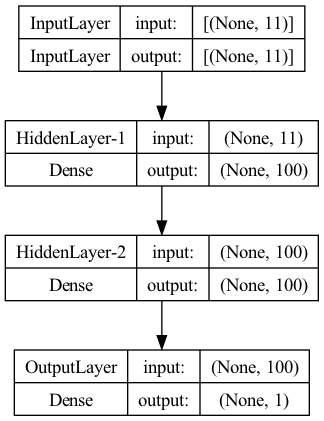

In [30]:
visualize_model(model_3)

In [31]:
mae_3 = mae(y_test, y_pred_3)
mse_3 = mae(y_test, y_pred_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=3167.311>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3167.311>)

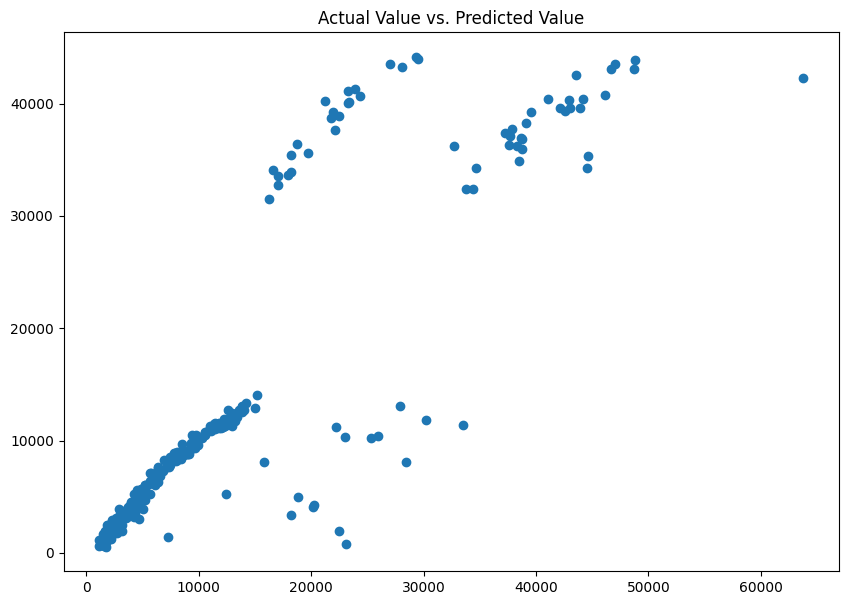

In [32]:
plot_actual_versus_predicted_data(y_test, y_pred_3)

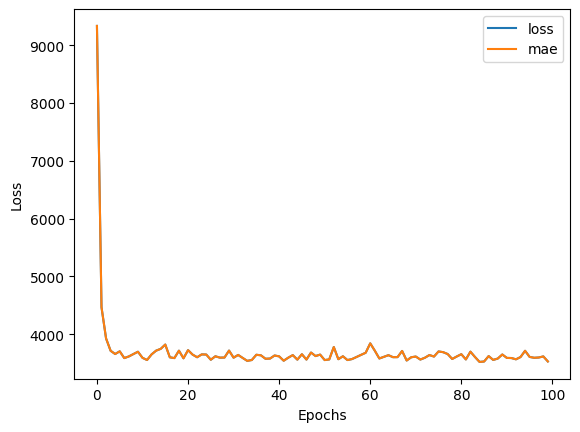

In [33]:
plot_history(history_3)

### Trial-4: 2 Hidden layers with 100 Neurons & Adam Optimizer w/ 0.05 lr & Epochs=100 with Early Stop

#### Creating, Compiling, and Fitting

In [ ]:
# 1. Create Model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(11,)),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])


# 2. Compile Model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.05),
                )